In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
customer_data = pd.read_csv('Mall_Customers.csv')

In [3]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# No null values in dataset.

In [6]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Encoding Gender column.

In [7]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False)

In [8]:
gen_encoded = encoder.fit_transform(customer_data[['Gender']])
gen_features = encoder.get_feature_names_out(['Gender'])
gen_df = pd.DataFrame(gen_encoded, columns = gen_features, index = customer_data.index)

In [9]:
customer_data = pd.concat([customer_data.drop('Gender', axis=1), gen_df], axis=1)
customer_data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0.0,1.0
1,2,21,15,81,0.0,1.0
2,3,20,16,6,1.0,0.0
3,4,23,16,77,1.0,0.0
4,5,31,17,40,1.0,0.0


In [10]:
customer_data.shape

(200, 6)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

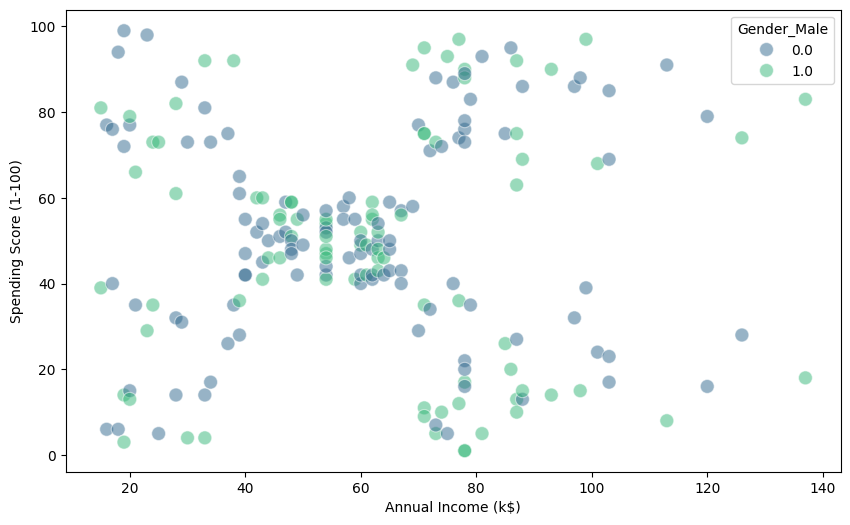

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = customer_data, x='Annual Income (k$)', y='Spending Score (1-100)', palette='viridis', s = 100, alpha = 0.5, hue = 'Gender_Male')

# Spending score plotted against Annual Income forms clustered data, so we can use KMeans algorithm for it. 

In [12]:
from sklearn.metrics import silhouette_score

inertia = []
sil_scores = []
train_data = customer_data[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[: , :].values
for n in range(1 , 10):
    km = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter = 300, tol = 0.0001,  random_state = 42  , algorithm = 'lloyd') )
    km.fit(train_data)
    inertia.append(km.inertia_)
    if len(np.unique(km.labels_)) > 1:
        score = silhouette_score(train_data, km.labels_)
        sil_scores.append(score)
print(sil_scores)

[0.2968969162503008, 0.46761358158775435, 0.4931963109249047, 0.553931997444648, 0.53976103063432, 0.5288104473798049, 0.45481197931195283, 0.4561091950997367]


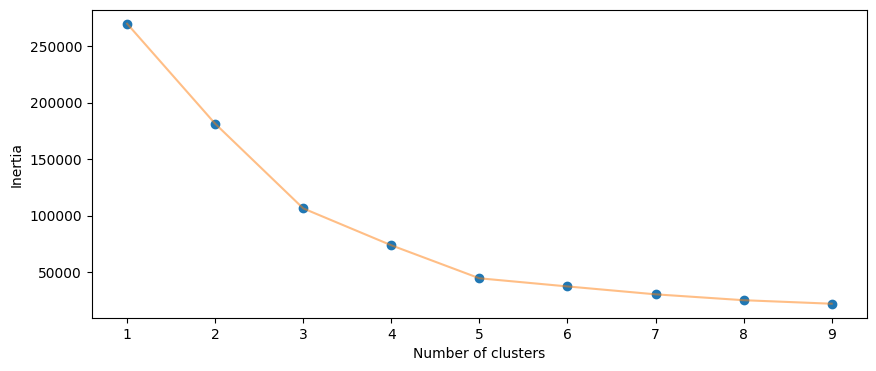

In [13]:
plt.figure(figsize = (10, 4))
plt.plot(np.arange(1, 10), inertia , 'o')
plt.plot(np.arange(1, 10), inertia , '-', alpha = 0.5)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

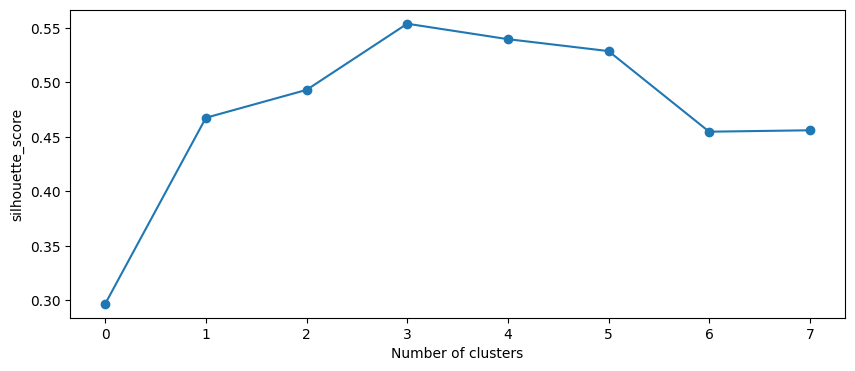

In [14]:
plt.figure(figsize = (10 ,4))
plt.plot(np.arange(0, 8), sil_scores, marker='o', linestyle='-')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.show()

# Silhouette score shows 4 clusters should be made whereras intertia shows 5 clusters should be made. Since scatter plot looks more like 5 clusters, we will go for n_clusters = 5.

In [15]:
km_final = (KMeans(n_clusters = 5, init='k-means++', n_init = 10 , max_iter = 300, tol = 0.0001,  random_state= 42  , algorithm='lloyd'))
km_final.fit(train_data)
labels = km_final.labels_
centroids = km_final.cluster_centers_
print(labels)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


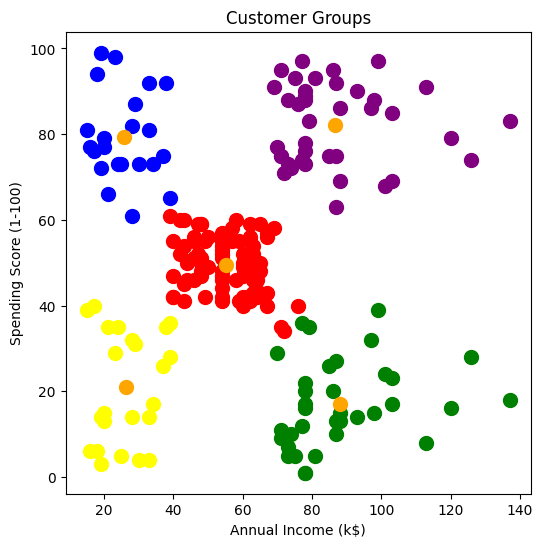

In [17]:
plt.figure(figsize=(6,6))
plt.scatter(train_data[labels == 0,0], train_data[labels == 0,1], s=100, c='red', label='Cluster 1')
plt.scatter(train_data[labels == 1,0], train_data[labels == 1,1], s=100, c='purple', label='Cluster 2')
plt.scatter(train_data[labels == 2,0], train_data[labels == 2,1], s=100, c='blue', label='Cluster 3')
plt.scatter(train_data[labels == 3,0], train_data[labels == 3,1], s=100, c='green', label='Cluster 4')
plt.scatter(train_data[labels == 4,0], train_data[labels == 4,1], s=100, c='yellow', label='Cluster 5')
plt.scatter(centroids[:,0], centroids[:,1], s=100, c='orange', label='Centroids')
plt.title('Customer Groups')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Thus 5 clusters have been formed successfully.